In [1]:
# import necessary packages

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

## Number 1

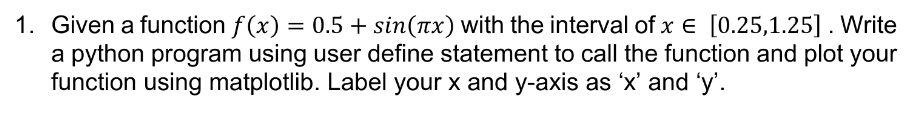

In [2]:
# define the function

def f(x):
    return 0.5+np.sin(np.pi*x)

In [3]:
# create an array

xmin = 0.25
xmax = 1.25
nx = 1000

x = np.linspace(xmin, xmax, nx)

In [4]:
# calculate the function

y = f(x)

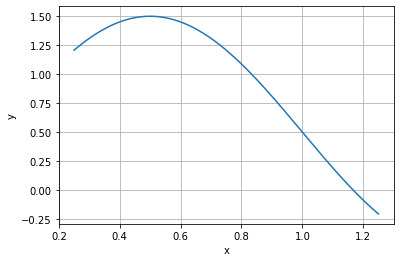

In [5]:
# visualization

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)


## Number 2

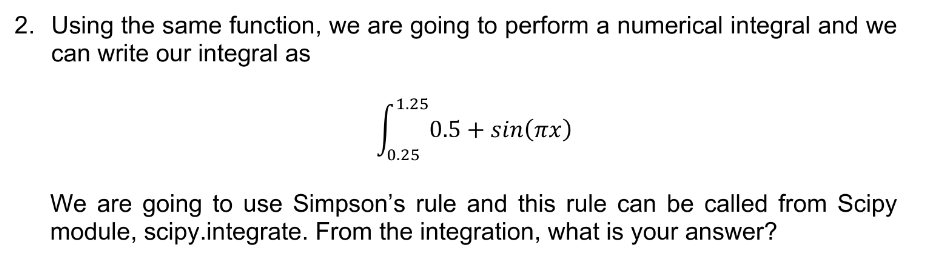

In [6]:
# calculate integration result in that range using Simpson method in Scipy

simpson_int = integrate.simpson(y,x)
print(f'Scipy Simpson integration result: {simpson_int}')

Scipy Simpson integration result: 0.9501581580778805


## Number 3

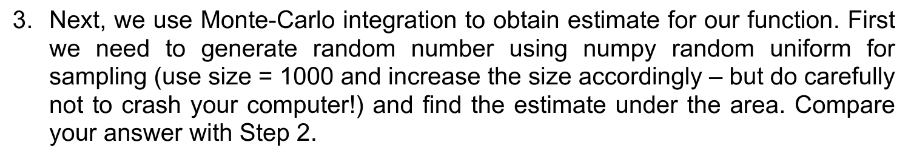

## Description

What is an integral? Simply speaking, integral is the area confined by a function and x-axis. But hold on!!! It doesn't stop there! If the area is above the x-axis, the value must have a positive sign. If the area is below the x-axis, the value must have a negative sign.

To estimate the area of a particular region, we can use Monte Carlo method. Monte Carlo method is basically done by drawing points randomly accross that particular region and its surrounding. The area of the region in interest can simply be estimated by comparing the number of points confined and the number of points within a known certain area.

Consequently, to find the integral by using Monte Carlo, you must draw random points from zero (x-axis) up to a limit, such that the drawing region covers all part of the function. This drawing region doesn't have to be in a certain shape. As an example here, we'll use a rectangle drawing region.

In [7]:
def int_monte_carlo(f, xmin, xmax, nsample, n_init=1000, corr_factor=1.1, plot=False):
    """Monte Carlo integration"""
    
    ### find the maximum of f(x) in x-range
    x_init = np.linspace(xmin, xmax, n_init)
    y_init = f(x_init)
    ymin, ymax = np.min(y_init), np.max(y_init)
    ylim = corr_factor * np.max(np.abs([ymin, ymax]))
    
    ### the integral part
    x_r = np.random.uniform(xmin, xmax, nsample)
    y_r = np.random.uniform(0, ylim, nsample)
    sign = np.where(f(x_r) > 0, 1, -1) # positive or negative section, 1 for larger than 0, -1 for less than 0
    y_r = sign * y_r
    
    confined_point = np.where(np.abs(y_r) <= np.abs(f(x_r)), 1, 0)
    all_point = sign*confined_point # 0 not confined, +1 confined above x-axis and -1 confined below x-axis
    
    integral_result = np.sum(all_point)/nsample * (xmax-xmin) * ylim 
    
    ### plot the result
    if plot:
        x = np.linspace(xmin, xmax, 100)
        y = f(x)
        plt.plot(x_r[np.where(all_point==1)], y_r[np.where(all_point==1)], 'b,')
        plt.plot(x_r[np.where(all_point==-1)], y_r[np.where(all_point==-1)], 'r,')
        plt.plot(x_r[np.where(all_point==0)], y_r[np.where(all_point==0)], 'k,')
        plt.plot(x, y, 'm-')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim([xmin, xmax])
        plt.grid(True)
    
    return integral_result

Monte Carlo integration result: 0.9487168045371659
Scipy Simpson integration result: 0.9501581580778805


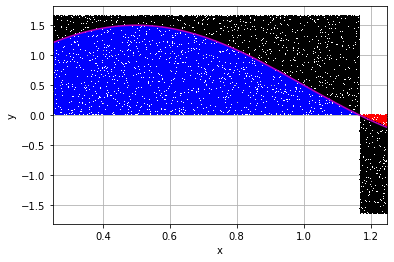

In [8]:
integral_result = int_monte_carlo(f, xmin, xmax, nsample=100000, plot=True)
print(f'Monte Carlo integration result: {integral_result}')
print(f'Scipy Simpson integration result: {simpson_int}')

## Let's check the convergence

In [9]:
### make an array of nsample to check the result of integration if we increase the number of sample drawn
grid_n = np.arange(1000,100000, 1000)

In [10]:
### calculate the integral result in every value of nsample
result = []
for nsample in grid_n:
    result.append(int_monte_carlo(f,xmin,xmax,nsample))

Text(0, 0.5, 'Result')

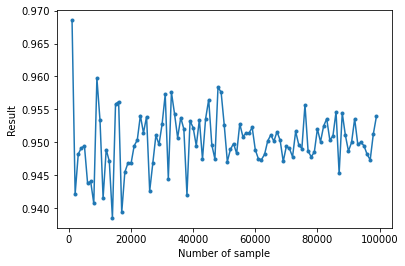

In [11]:
### plot how the integral result changes by changing nsample
plt.plot(grid_n,result,'.-')
plt.xlabel('Number of sample')
plt.ylabel('Result')

## So what??

We need to examine the convergence to see how many samples are needed approximately to obtain the accuracy that we want to achieve. Once we've seen that the result is no longer changing, or at least less fluctuating, we may say that the number of samples we use is sufficient.

To find the result of a value that we want (an integral of an area in this code), we can do the sampling multiple times using the same number of samples ($nsample$ in this code) that we find sufficient, then find their average.